In [2]:

import os
current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, '../../../1. Explorative Analysis & Preprocessing/nasiba/'))
os.chdir(src_path) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from textblob import TextBlob
import nltk
import re
import string
import emoji

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import Counter
from spellchecker import SpellChecker

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import os
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import Word, TextBlob
pd.set_option('display.max_colwidth', None)
spell = SpellChecker()


In [8]:

csv_path_train = os.path.abspath(os.path.join(current_dir, '../../../data/twitter_hate-speech/train.csv'))
df_origin = pd.read_csv(csv_path_train, encoding='utf-8', index_col=0)
filepath_name = os.path.abspath(os.path.join(src_path, 'data/train_cleaned.csv'))
df_cleaned = pd.read_csv(filepath_name, encoding='utf-8')
df_cleaned.head()

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
2,3,0,bihday your majesty,bihday majesty,0,[],NaN
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kissing sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
4,5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN


In [ ]:
print(df_origin.tweet.count())
print(df_cleaned.tweet.count())
print(df_cleaned.tweet.count() - df_origin.tweet.count())
print((df_cleaned.tweet.count() / df_origin.tweet.count() - 1) * 100)

In [ ]:
print(df_origin[df_origin.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count() - df_origin[df_origin.label == 1].count())
print((df_cleaned[df_cleaned.label == 1].count() / df_origin[df_origin.label == 1].count() - 1) * 100)

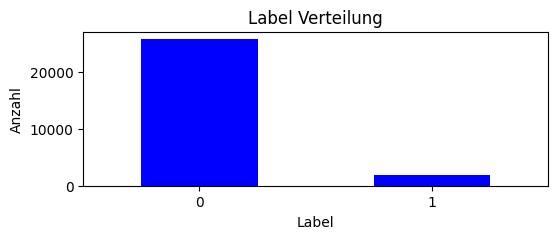

In [5]:
label_counts = df_cleaned['label'].value_counts()

plt.figure(figsize=(6,2))
label_counts.plot(kind='bar', color='blue')
plt.title('Label Verteilung')
plt.xlabel('Label')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()

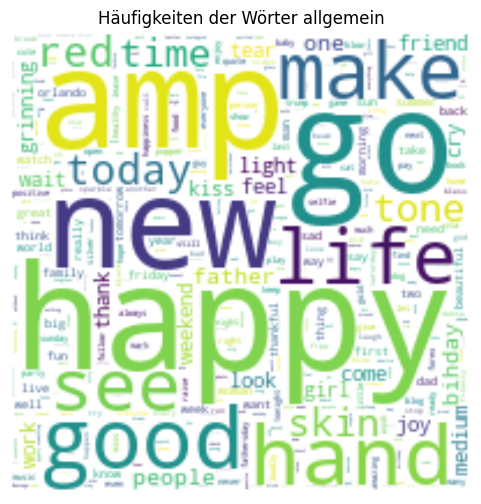

In [7]:
df_cleaned['tweet_cleaned'] = df_cleaned['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_cleaned['tweet_cleaned'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Wörter allgemein")
plt.show()

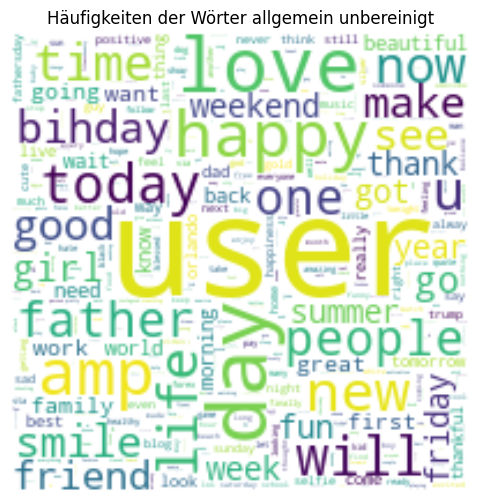

In [9]:
df_cleaned['tweet'] = df_cleaned['tweet'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_cleaned['tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Wörter allgemein unbereinigt")
plt.show()

In [6]:
df_analyse_label_0= df_cleaned[df_cleaned['label']==0]
df_analyse_label_1= df_cleaned[df_cleaned['label']==1]

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\1678384975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_0['tweet_cleaned'] = df_analyse_label_0['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')


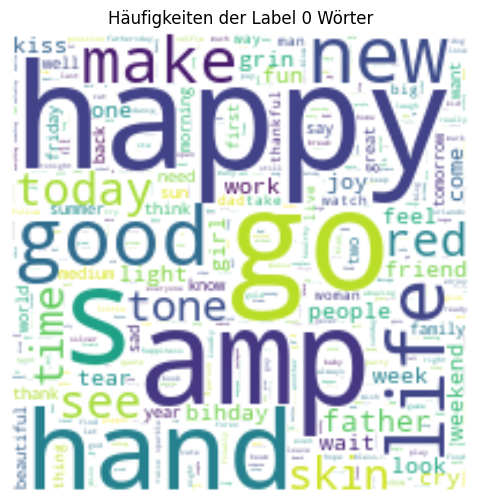

In [7]:
df_analyse_label_0['tweet_cleaned'] = df_analyse_label_0['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_0['tweet_cleaned'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 0 Wörter")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\3443010156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_1['tweet_cleaned'] = df_analyse_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')


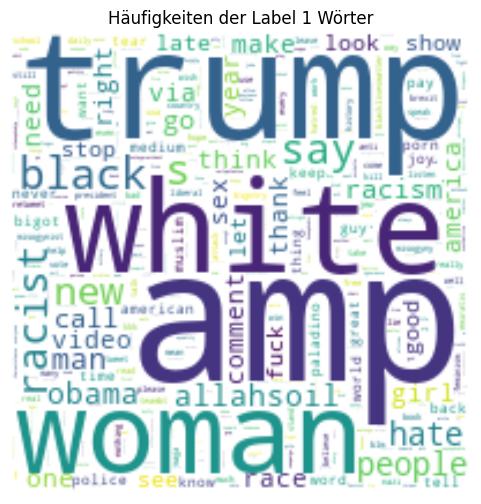

In [8]:
df_analyse_label_1['tweet_cleaned'] = df_analyse_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['tweet_cleaned'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Wörter")
plt.show()

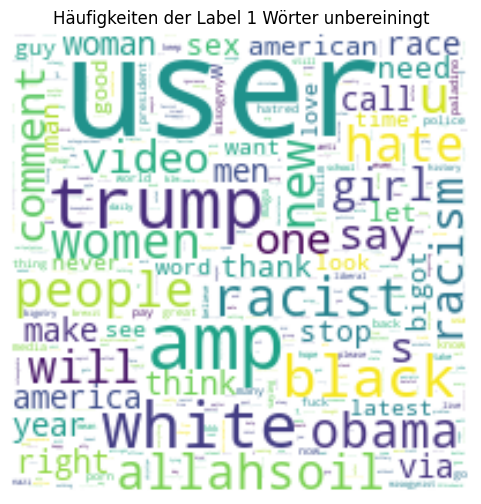

In [10]:
df_analyse_label_1['tweet'] = df_analyse_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Wörter unbereiningt")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\1601303686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_0['hashtags'] = df_analyse_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')


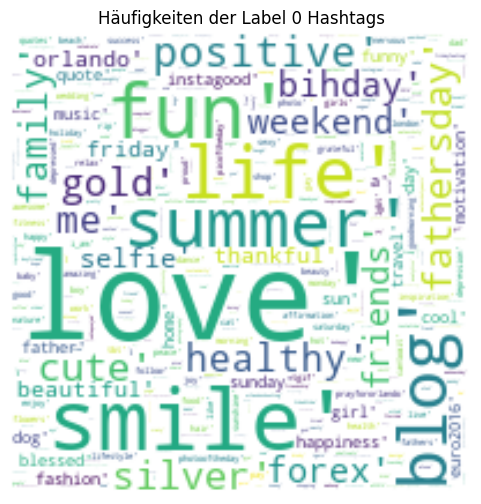

In [9]:
df_analyse_label_0['hashtags'] = df_analyse_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_0['hashtags'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 0 Hashtags")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\2497192674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_1['hashtags'] = df_analyse_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')


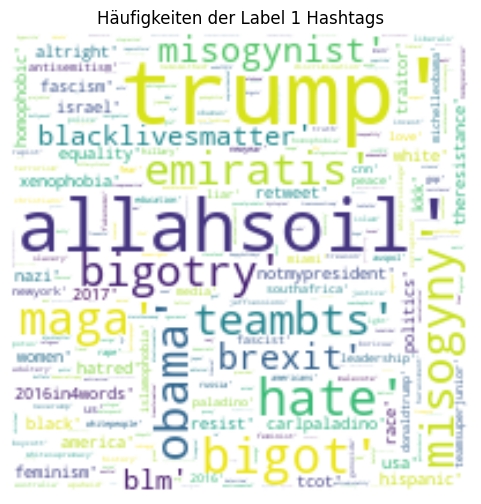

In [10]:
df_analyse_label_1['hashtags'] = df_analyse_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['hashtags'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Hashtags")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\2898506794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_0['tweet'] = df_analyse_label_0['tweet'].apply(lambda x: x if isinstance(x, str) else '')


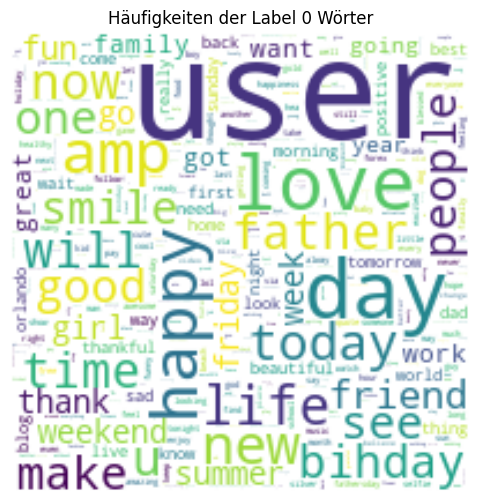

In [11]:
df_analyse_label_0['tweet'] = df_analyse_label_0['tweet'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_0['tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 0 Wörter")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\2446552789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_1['tweet'] = df_analyse_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')


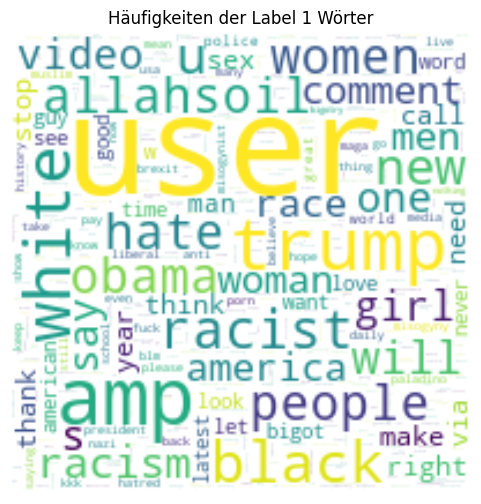

In [12]:
df_analyse_label_1['tweet'] = df_analyse_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Wörter")
plt.show()

In [ ]:
freq_words = pd.Series(' '.join(df_raw['tweet']).split()).value_counts()[:10]

words = freq_words.index
counts = freq_words.values
plt.figure(figsize=(8, 2)) 
plt.bar(words, counts, color='skyblue') 

plt.xticks(rotation=20)
plt.tight_layout()  
plt.show()

In [11]:
# Filter rows where 'tweet_cleaned' contains the word "amp"
amp_tweets = df_cleaned[df_cleaned['tweet_cleaned'].str.contains(r'\bamp\b', case=False, na=False)]
amp_tweets

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
22,23,0,product of the day: happy man #wine tool who's it's the #weekend? time to open up &amp; drink up!,product happy man wine tool weekend time open amp drink,0,"['#wine', '#weekend']",NaN
63,65,0,@user my wife whom i adore had to miss your poland show because she had surgery. her name is bridget &amp; she's my everything.,wife adore miss poland show surgery name amp everything,1,[],NaN
81,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy,altright use amp man whitesupremacy,0,"['#altright', '#whitesupremacy']",NaN
109,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics brings…,interested address race amp racism power bring,1,"['#linguistics', '#race', '#power', '#raciolinguistics']",NaN
128,132,1,#people aren't protesting #trump because a #republican won-they do so because trump has fuhered &amp;…,people protest trump republican trump amp,0,"['#people', '#trump', '#republican']",NaN
...,...,...,...,...,...,...,...
27473,31773,1,"#hatred,#greed&amp; destroyed many lives,but mad #leadership &amp; bad #government policies have destroyed more. #newyear2017 #politics",destroy many mad leadership amp bad government policy destroy newyear politic,0,"['#hatred', '#greed', '#leadership', '#government', '#newyear2017', '#politics']",NaN
27485,31786,0,@user doesn't care abt u. let's be honest. he cares about himself &amp; his money!! all of you are getting played. #neverump,care u let honest care amp money getting play neverump,1,['#neverump'],NaN
27550,31868,0,i want some cereal &amp; ain't tryna get up 💀,want cereal amp tryna get skull,0,[],:skull:
27602,31934,1,@user judd is a &amp; #homophobic #freemilo #milo #freemilo #milo #freemilo #milo #freemilo #milo #freemilo,amp homophobic freemilo milo freemilo milo freemilo milo freemilo milo freemilo,1,"['#homophobic', '#freemilo', '#milo', '#freemilo', '#milo', '#freemilo', '#milo', '#freemilo', '#milo', '#freemilo']",NaN
